In [1]:
import pandas as pd, numpy as np, os, re
from bs4 import BeautifulSoup
from glob import iglob
import codecs
pd.set_option('display.max_columns', 40)

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, LeaveOneOut

from sklearn.model_selection import cross_val_score


In [3]:
from matplotlib import pyplot as plt

#### Rename html files

In [4]:
path_al = '/home/jeferson/personal_projects/scraping_cars/results/al'
files = os.listdir(path_al)


for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, file.split('-')[1] + '.html'))

In [5]:
# Alabama : 724716247 , 706708719

def soup_func(filename):
    html = codecs.open(path_al + '/' + filename, 'r').read()
    return BeautifulSoup(html, 'lxml')



In [6]:
def get_price(soup):
    vehicle_price = soup.find('span', class_=
              'vehicle-info__price-display')
    if vehicle_price:
        return vehicle_price.text

In [7]:
def get_msrp_price(soup):
    vehicle_msrp_tag = soup.find('span',
        attrs={'class':'vehicle-info__price-label vehicle-info__price-label--msrp'})
    if vehicle_msrp_tag:
        sibling_msrp = vehicle_msrp_tag.nextSibling
        if sibling_msrp:
            return sibling_msrp.text


In [8]:
def get_price_drop(soup):
    price_drop = soup.find('span',
            attrs={'class':'vdp-cap-price__prev vehicle-info__price-drop'})

    if price_drop:
        tag_drop = price_drop.find('s', class_='strike-through')
        if tag_drop:
            return tag_drop.text

In [9]:
def price_comparison_tool(soup):
    badge_tag = soup.find('a', attrs={'cars-smooth-scroll':'price-comparison-tool'} )

    if badge_tag:
        return badge_tag.find('span').text

In [10]:
def dealer_rating(soup):
    dealer_ratings = soup.find('p', class_='rating__link rating__link-details' )
    if dealer_ratings:
        list_rate = re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", dealer_ratings.text)
        if len(list_rate) > 1:
            return [list_rate[0], list_rate[1]]
        else:
            return [-1, -1]
    else:
        return [-1, -1]

In [11]:
def overall_rating(soup):
    overall_rating = soup.find('cars-star-ratings' )
    if overall_rating:
        return overall_rating.get('bound-rating')

In [12]:
def consumers_review(soup):
    consumer_reviews = soup.find('div', class_='review-stars-average' )
    if consumer_reviews:
        a_lnk = consumer_reviews.find('a', attrs={'data-linkname':'consumer-reviews-total-reviews'})
        if a_lnk:
            return a_lnk.text



In [13]:
def mileage(soup):
    mileage = soup.find('div', class_='vdp-cap-price__mileage--mobile vehicle-info__mileage')
    if mileage:
        return mileage.text

In [14]:
def count_photo(soup):
    count_photos = soup.find('div', class_='photo-count__count')
    if count_photos:
        return count_photos.text    
    

In [15]:
def get_all_details(soup):
    details = dict()
    for x in soup.findAll('li', class_= 'vdp-details-basics__item' ):
        if x:
            s = x.text.strip()
            key = s[ : s.find(':')].strip()
            value = s[s.find(':')+1 : ].strip()
            details[key] = value
    return details


In [16]:
# s = '(4.8) 1086 Reviews'
# list_rate = re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", s)
# print(list_rate[0], list_rate[1])

In [ ]:
# soup = soup_func('722348066.html')
# print(f)
# print(get_price(soup))
# print(get_msrp_price(soup))
# print(get_price_drop(soup))
# print(price_comparison_tool(soup))

# list_rate_seller = dealer_rating(soup)
# seller_rating, seller_count_rating = list_rate_seller[0], list_rate_seller[1]
# print('seller_rate', seller_rating , '\n', 'seller_count_review', seller_count_rating)
# ## print('\n', list_rate_seller, '\n')

# print(overall_rating(soup))
# print(consumers_review(soup))
# print(mileage(soup))
# print(count_photo(soup))
# print('\n\n')

In [17]:
tab = []
for f in files[:]:
    soup = soup_func(f)
    
    list_rate_seller = dealer_rating(soup)   
    seller_rating, seller_count_rating = list_rate_seller[0], list_rate_seller[1]

    tab.append([f, get_price(soup), get_msrp_price(soup), get_price_drop(soup),
              price_comparison_tool(soup), seller_rating, seller_count_rating, overall_rating(soup),
              consumers_review(soup), count_photo(soup), get_all_details(soup)])


In [18]:
df_al = pd.DataFrame(tab, columns=['id','price', 'msrp_price', 'original_price', 
                                  'good_offer', 'seller_rating', 'seller_count_rating', 'car_rate', 'consumers_review',
                                   'n_photos', 'details'])

In [19]:
# df_al_bkp = df_al.copy()
# df_al = df_al_bkp.copy()

In [20]:
df_al = df_al.join(pd.DataFrame(df_al.pop('details').tolist()))

In [21]:
df_al

,id,price,msrp_price,original_price,good_offer,seller_rating,seller_count_rating,car_rate,consumers_review,n_photos,City MPG,Drivetrain,Engine,Exterior Color,Fuel Type,Highway MPG,Interior Color,Mileage,Stock,Transmission,VIN
0,764468313.html,"$23,665","$23,665",None,None,4.6,122,4.3,129 reviews,15,30,FWD,1.4L I4 16V GDI DOHC Turbo,Habanero Orange,Gasoline,40,Black,10,064638,8-Speed Automatic,3VWC57BU9KM064638
1,767179379.html,"$28,994",None,None,Good Deal,4.8,1086,4.8,36 reviews,41,NaN,RWD,Twin Turbo Premium Unleaded V-6 3.0 L/183,Iridium Silver Metallic,Gasoline,NaN,Red/Black,"37,224",30749,7-Speed Automatic w/OD,WDDKJ6FB4GF335325
2,755158647.html,"$31,000","$34,515",None,None,4.9,226,5,12 reviews,32,22,RWD,2.0L I4 16V GDI DOHC Turbo,Snow White Pearl,Gasoline,29,Black,5,A4451,8-Speed Automatic,KNAE15LA9K6050316
3,753572999.html,"$19,471","$20,230",None,None,5,169,4.4,45 reviews,18,NaN,FWD,1.6L I4 16V MPFI DOHC,Brilliant Silver,Gasoline,NaN,Charcoal,10,N18398T,Automatic CVT,3N1CP5CUXJL531315
4,765408319.html,"$22,995",None,$23995,Good Deal,4.8,1086,4.8,54 reviews,43,21,RWD,Premium Unleaded V-6 2.5 L/152,Ultra White,Gasoline,30,Black/Garnet,"51,225",30477,6-Speed Automatic w/OD,JTHBF1D2XF5067210
5,757108951.html,"$28,419","$29,980",None,None,4.9,287,4.7,25 reviews,9,25,FWD,2.5L I4 16V GDI DOHC,Soul Red Crystal Metallic,Gasoline,31,Silk Beige,1,M14379,6-Speed Automatic,JM3KFACM9K1505437
6,763433458.html,"$22,574","$24,120",None,None,4.8,236,4.9,55 reviews,18,31,FWD,1.5L 1.5L I-4 DI DOHC Turbocharged,Aegean Blue Metallic,Gasoline,40,Black,14,190476,Automatic,2HGFC3B37KH352227
7,767048297.html,"$33,000",None,$33800,Great Deal,4.6,289,4.7,97 reviews,29,19,AWD,3.5L V6 24V GDI SOHC,Black,Gasoline,27,Espresso,"50,180",2000257883,9-Speed Automatic,5FRYD4H55HB001977
8,766994144.html,"$17,300",None,None,Good Deal,4.6,263,4.8,550 reviews,35,23,FWD,Intercooled Turbo Regular Unleaded I-4 1.5 L/91,Red,Gasoline,30,Char Blk Heated Leather-T,"75,639",19T315,6-Speed Automatic w/OD,1FMCU0JD7HUA88208
9,764520647.html,"$35,285",None,None,Good Deal,4.5,63,4.6,81 reviews,32,16,RWD,8 Cylinder Engine 5.3L,White,Gasoline,22,NaN,"89,029",F1422B,AUTOMATIC,1GNSCCKC9FR203313


df_al.to_csv('df.csv', sep=';', index=False)

In [25]:
df_al = df_al[df_al.Mileage != 'Not provided']

array(['10', '37,224', '5', ..., '51,117', '40,043', '43,538'],
      dtype=object)

In [35]:
df_al.price = df_al.price.apply(lambda x: x.replace('$', '').replace(',', ''))
df_al.msrp_price = df_al.msrp_price.apply(lambda x: x.replace('$', '').replace(',', '') if x else x)

df_al.original_price = df_al.original_price.apply(lambda x: x.replace('$', '').replace(',', '') if x else x)
df_al.Mileage = df_al.Mileage.apply(lambda x: float(x.replace(',', '').strip()) if x else x)

In [36]:
df_al.seller_rating = df_al.seller_rating.astype('float')
df_al.car_rate = df_al.car_rate.astype('float')

df_al.n_photos = df_al.n_photos.apply(lambda x: int(x) if x else x)
df_al.seller_count_rating = df_al.seller_count_rating.astype('int')


In [37]:
df_al.consumers_review = df_al.consumers_review.apply(lambda x: int(x.replace('reviews', '').strip()) if x else x)

In [38]:
df_al.drop('id', inplace=True, axis=1)

/home/jeferson/.virtualenvs/scrap/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


df_al.fillna(-1, inplace=True)

In [39]:
df_al.price = df_al.price.astype('float')
df_al.msrp_price = df_al.msrp_price.astype('float')
df_al.original_price = df_al.original_price.astype('float')

In [40]:
df_al.drop(columns=['VIN', 'Stock', 'Interior Color'],inplace=True)

In [47]:
df_al_2 = df_al.drop(['Transmission', 'Engine', 'Exterior Color'], axis=1)

In [48]:
df_al_2

,price,msrp_price,original_price,good_offer,seller_rating,seller_count_rating,car_rate,consumers_review,n_photos,City MPG,Drivetrain,Fuel Type,Highway MPG,Mileage
0,23665.0,23665.0,NaN,None,4.6,122,4.3,129.0,15.0,30,FWD,Gasoline,40,10.0
1,28994.0,NaN,NaN,Good Deal,4.8,1086,4.8,36.0,41.0,NaN,RWD,Gasoline,NaN,37224.0
2,31000.0,34515.0,NaN,None,4.9,226,5.0,12.0,32.0,22,RWD,Gasoline,29,5.0
3,19471.0,20230.0,NaN,None,5.0,169,4.4,45.0,18.0,NaN,FWD,Gasoline,NaN,10.0
4,22995.0,NaN,23995.0,Good Deal,4.8,1086,4.8,54.0,43.0,21,RWD,Gasoline,30,51225.0
5,28419.0,29980.0,NaN,None,4.9,287,4.7,25.0,9.0,25,FWD,Gasoline,31,1.0
6,22574.0,24120.0,NaN,None,4.8,236,4.9,55.0,18.0,31,FWD,Gasoline,40,14.0
7,33000.0,NaN,33800.0,Great Deal,4.6,289,4.7,97.0,29.0,19,AWD,Gasoline,27,50180.0
8,17300.0,NaN,NaN,Good Deal,4.6,263,4.8,550.0,35.0,23,FWD,Gasoline,30,75639.0
9,35285.0,NaN,NaN,Good Deal,4.5,63,4.6,81.0,32.0,16,RWD,Gasoline,22,89029.0


In [49]:
df_al_2_bkp = df_al_2.copy()

In [50]:
dummies = ['Drivetrain', 'good_offer', 'Fuel Type']

for dummy in dummies:
    df_al_2 = pd.concat([df_al_2, pd.get_dummies(df_al_2[dummy], drop_first=True) ], axis=1)  
    df_al_2.drop(dummy, inplace=True, axis=1)
 

In [53]:
df_al_2.fillna(-1, inplace=True)

In [ ]:
# df_al_bkp_2 = df_al.copy()

# df_al = df_al_bkp_2.copy()

### Linear Models

## TO-DO:
- Put Engine Type(Parsing)
- Year manufacturing
- Brand
- Model
- Type of transmission
- Numer of gears

In [54]:
X = df_al_2.drop('price',axis=1)
y = df_al_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3867, 37) (3867,)
(967, 37) (967,)


In [55]:
# X = df_al.drop('price', axis=1)
# y = df_al['price']

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [56]:
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.5780314610365256
0.6297011681963245


Text(0, 0.5, 'Predictions')

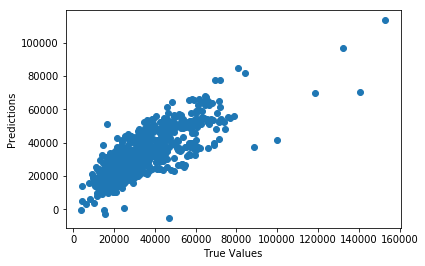

In [57]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Cross-validation

In [ ]:

X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

In [ ]:

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]